In [163]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [164]:
df = pd.read_csv('/kaggle/input/five-years-weather-data-of-kolkata/Kolkata_weather_data(2017-2022).csv')

# Drop useless columns
cols_to_drop = ['Info', 'Wind Chill', 'Wind Gust', 'Snow Depth', 
                'Address', 'Resolved Address', 'Name', 'Latitude', 'Longitude', 
                'Stations', 'icon', 'sunrise', 'sunset', 'Heat Index',
                'Weather Type','Wind Speed','Wind Direction',
               'Precipitation Cover','Conditions']
df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

In [165]:
df.sample()

,Date time,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Precipitation,Visibility,Cloud Cover,Sea Level Pressure
1075,12/12/2019,16.0,26.1,21.3,18.4,84.23,0.0,1.7,26.9,1014.9


In [166]:
df['Date time'] = pd.to_datetime(df['Date time'])
df = df.sort_values('Date time').reset_index(drop=True)
print(df.sample())
day_of_year = df['Date time'].dt.dayofyear
df['Day_sin'] = np.sin(2 * np.pi * day_of_year / 365.25)
df['Day_cos'] = np.cos(2 * np.pi * day_of_year / 365.25)
df.sample()

    Date time  Minimum Temperature  Maximum Temperature  Temperature  \
63 2017-03-05                 24.0                 31.0         27.1   

    Dew Point  Relative Humidity  Precipitation  Visibility  Cloud Cover  \
63       21.8              73.69            0.0         2.2         42.1   

    Sea Level Pressure  
63              1007.5  


,Date time,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Precipitation,Visibility,Cloud Cover,Sea Level Pressure,Day_sin,Day_cos
2118,2022-10-20,24.0,32.0,27.8,21.7,70.65,0.0,2.2,17.3,1011.5,-0.946714,0.322076


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date time            2191 non-null   datetime64[ns]
 1   Minimum Temperature  2191 non-null   float64       
 2   Maximum Temperature  2191 non-null   float64       
 3   Temperature          2191 non-null   float64       
 4   Dew Point            2191 non-null   float64       
 5   Relative Humidity    2191 non-null   float64       
 6   Precipitation        2191 non-null   float64       
 7   Visibility           2191 non-null   float64       
 8   Cloud Cover          2191 non-null   float64       
 9   Sea Level Pressure   2190 non-null   float64       
 10  Day_sin              2191 non-null   float64       
 11  Day_cos              2191 non-null   float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 205.5 KB


In [168]:
df['Sea Level Pressure'] = df['Sea Level Pressure'].fillna(method='ffill')

/tmp/ipykernel_47/1181059035.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Sea Level Pressure'] = df['Sea Level Pressure'].fillna(method='ffill')


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date time            2191 non-null   datetime64[ns]
 1   Minimum Temperature  2191 non-null   float64       
 2   Maximum Temperature  2191 non-null   float64       
 3   Temperature          2191 non-null   float64       
 4   Dew Point            2191 non-null   float64       
 5   Relative Humidity    2191 non-null   float64       
 6   Precipitation        2191 non-null   float64       
 7   Visibility           2191 non-null   float64       
 8   Cloud Cover          2191 non-null   float64       
 9   Sea Level Pressure   2191 non-null   float64       
 10  Day_sin              2191 non-null   float64       
 11  Day_cos              2191 non-null   float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 205.5 KB


In [170]:
df.describe()

,Date time,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Precipitation,Visibility,Cloud Cover,Sea Level Pressure,Day_sin,Day_cos
count,2191,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000
mean,2020-01-01 00:00:00,22.736604,31.397490,26.677088,21.713555,76.298530,4.492268,2.022821,41.431858,1007.770561,0.000001,-0.000228
min,2017-01-01 00:00:00,9.000000,18.000000,14.200000,5.800000,41.150000,0.000000,0.700000,0.000000,988.400000,-0.999999,-0.999979
25%,2018-07-02 12:00:00,19.000000,29.000000,23.600000,17.100000,69.075000,0.000000,1.800000,14.900000,1003.000000,-0.703677,-0.707487
50%,2020-01-01 00:00:00,25.000000,32.000000,28.300000,24.000000,77.080000,0.000000,2.100000,45.100000,1007.900000,-0.004301,0.001075
75%,2021-07-01 12:00:00,27.000000,34.600000,30.000000,26.300000,84.220000,1.675000,2.300000,63.600000,1012.800000,0.706727,0.702913
max,2022-12-31 00:00:00,30.500000,41.000000,34.800000,30.100000,97.230000,232.770000,3.200000,100.000000,1019.700000,0.999986,0.999991
std,NaN,5.228905,4.135988,4.415869,5.510843,10.249919,13.268362,0.334513,27.920853,5.949094,0.707349,0.707187


In [171]:
features=list(df.columns)
features

['Date time',
 'Minimum Temperature',
 'Maximum Temperature',
 'Temperature',
 'Dew Point',
 'Relative Humidity',
 'Precipitation',
 'Visibility',
 'Cloud Cover',
 'Sea Level Pressure',
 'Day_sin',
 'Day_cos']

In [172]:
features.remove('Date time')
features

['Minimum Temperature',
 'Maximum Temperature',
 'Temperature',
 'Dew Point',
 'Relative Humidity',
 'Precipitation',
 'Visibility',
 'Cloud Cover',
 'Sea Level Pressure',
 'Day_sin',
 'Day_cos']

In [173]:
train_df = df[df['Date time'].dt.year < 2022].copy()
test_df = df[df['Date time'].dt.year == 2022].copy()
train_df.tail()

,Date time,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Precipitation,Visibility,Cloud Cover,Sea Level Pressure,Day_sin,Day_cos
1821,2021-12-27,16.0,26.0,21.3,18.2,83.47,0.00,1.2,27.5,1017.0,-0.073045,0.997329
1822,2021-12-28,17.8,26.0,21.1,17.3,79.94,0.00,1.3,33.1,1016.4,-0.055879,0.998438
1823,2021-12-29,18.0,25.0,20.7,17.2,81.38,0.00,1.5,63.5,1016.5,-0.038696,0.999251
1824,2021-12-30,17.0,23.0,19.4,17.4,88.30,0.99,1.4,42.4,1018.9,-0.021501,0.999769
1825,2021-12-31,15.0,24.0,19.7,16.4,82.20,0.00,1.8,13.6,1019.4,-0.004301,0.999991


In [174]:
test_df.head()

,Date time,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Precipitation,Visibility,Cloud Cover,Sea Level Pressure,Day_sin,Day_cos
1826,2022-01-01,16.0,23.0,19.1,15.1,79.26,0.0,1.6,10.8,1018.6,0.017202,0.999852
1827,2022-01-02,14.0,23.0,17.9,14.6,82.32,0.0,1.4,21.9,1017.2,0.034398,0.999408
1828,2022-01-03,14.0,24.0,18.4,14.1,77.64,0.0,1.5,17.1,1015.9,0.051584,0.998669
1829,2022-01-04,13.0,23.0,17.6,13.4,78.03,0.0,1.3,1.1,1016.6,0.068755,0.997634
1830,2022-01-05,13.0,24.0,17.9,13.0,75.68,0.0,1.3,6.3,1015.8,0.085906,0.996303


In [175]:
print(f"Training Days: {len(train_df)}")
print(f"Testing Days: {len(test_df)}")

Training Days: 1826
Testing Days: 365


In [176]:
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_df[features])
test_scaled = scaler.transform(test_df[features])
test_scaled

array([[0.3255814 , 0.2173913 , 0.23786408, ..., 0.96485623, 0.50860432,
        0.99993064],
       [0.23255814, 0.2173913 , 0.17961165, ..., 0.9201278 , 0.51720263,
        0.99970873],
       [0.23255814, 0.26086957, 0.2038835 , ..., 0.87859425, 0.52579585,
        0.99933893],
       ...,
       [0.27906977, 0.34782609, 0.2815534 , ..., 0.91373802, 0.48065543,
        0.99963014],
       [0.2744186 , 0.34782609, 0.29126214, ..., 0.92971246, 0.4892527 ,
        0.99988903],
       [0.28372093, 0.39130435, 0.33495146, ..., 0.89456869, 0.49785316,
        1.        ]])

In [177]:
target_idx = features.index("Temperature")
target_idx

2

In [178]:
LOOKBACK_WINDOW = 14  # Input (X)
FORECAST_HORIZON = 7  # Output (y)

def create_multi_step_sequences(data, input_steps, output_steps, target_idx):
    X, y = [], []
    
    for i in range(len(data) - input_steps - output_steps + 1):
        
        X.append(data[i : (i + input_steps)])
        y.append(data[(i + input_steps) : (i + input_steps + output_steps), target_idx])
        
    return np.array(X), np.array(y)

In [179]:
X_train_seq, y_train_seq = create_multi_step_sequences(train_scaled, LOOKBACK_WINDOW, FORECAST_HORIZON, target_idx)

In [180]:
print(f"X_train: {X_train_seq.shape}  (Samples, Time Steps, Features)")
print(f"y_train: {y_train_seq.shape}  (Targets)")

X_train: (1806, 14, 11)  (Samples, Time Steps, Features)
y_train: (1806, 7)  (Targets)


In [181]:
X_test_seq, y_test_seq = create_multi_step_sequences(test_scaled, LOOKBACK_WINDOW, FORECAST_HORIZON, target_idx)

print(f"X_test shape: {X_test_seq.shape}")
print(f"y_test shape: {y_test_seq.shape}")

X_test shape: (345, 14, 11)
y_test shape: (345, 7)


In [182]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input

model = Sequential()
model.add(Input(shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
model.add(LSTM(64, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(32, activation='relu'))
model.add(Dense(FORECAST_HORIZON)) 
model.add(Dense(FORECAST_HORIZON)) 

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 14, 64)         │        19,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 14, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 7)              │           231 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 7)              │            56 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,159 (125.62 KB)

 Trainable params: 32,159 (125.62 KB)

 Non-trainable params: 0 (0.00 B)

In [183]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1),
    ModelCheckpoint('best_weather_model.keras', monitor='val_loss', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001, verbose=1)
]

In [184]:
history = model.fit(
    X_train_seq, y_train_seq,
    epochs=100, 
    batch_size=32,
    validation_data=(X_test_seq, y_test_seq),
    callbacks=callbacks, 
    verbose=1
)

Epoch 1/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2802 - mae: 0.4380
Epoch 1: val_loss improved from inf to 0.01902, saving model to best_weather_model.keras
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.2782 - mae: 0.4358 - val_loss: 0.0190 - val_mae: 0.1136 - learning_rate: 0.0010
Epoch 2/100
56/57 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0171 - mae: 0.1042
Epoch 2: val_loss improved from 0.01902 to 0.00729, saving model to best_weather_model.keras
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0170 - mae: 0.1040 - val_loss: 0.0073 - val_mae: 0.0706 - learning_rate: 0.0010
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0109 - mae: 0.0837
Epoch 3: val_loss improved from 0.00729 to 0.00585, saving model to best_weather_model.keras
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0109 - mae: 0.0837 - val_loss: 0.0059 - val_mae: 0.0607 - learning_rate: 0.0010
Epoch 4/100
53/57 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0095 - mae: 0.0775
Epoch 4: va

In [185]:
predictions_scaled = model.predict(X_test_seq)


def inverse_transform_temp(scaled_preds, scaler):
    dummy = np.zeros((len(scaled_preds), 11))
    dummy[:, 0] = scaled_preds
    unscaled = scaler.inverse_transform(dummy)
    return unscaled[:, 0]

unscaled_predictions = []
for i in range(predictions_scaled.shape[1]):
    day_pred = predictions_scaled[:, i]
    unscaled_predictions.append(inverse_transform_temp(day_pred, scaler))

unscaled_predictions = np.array(unscaled_predictions).T

unscaled_actuals = []
for i in range(y_test_seq.shape[1]):
    day_act = y_test_seq[:, i]
    unscaled_actuals.append(inverse_transform_temp(day_act, scaler))
unscaled_actuals = np.array(unscaled_actuals).T



11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


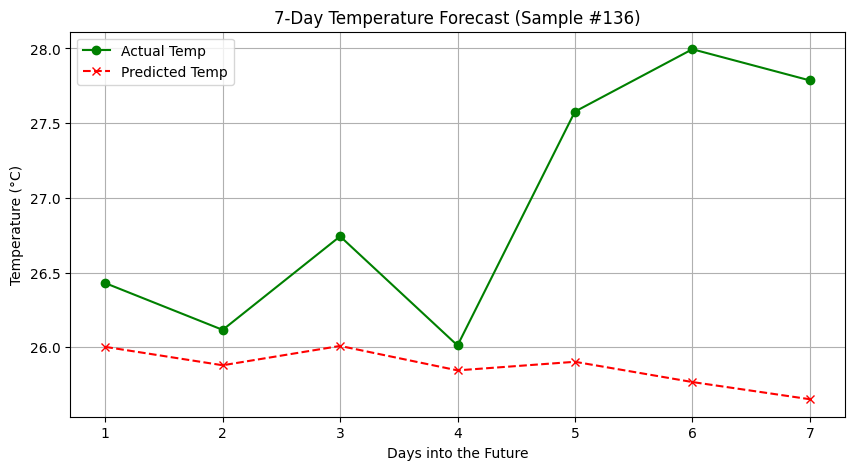

Final Model Accuracy: +/- 1.01 °C on average.


In [186]:
import matplotlib.pyplot as plt
import random
sample_idx = random.randint(0, len(unscaled_predictions) - 1)

plt.figure(figsize=(10, 5))
days = range(1, 8)

plt.plot(days, unscaled_actuals[sample_idx], marker='o', label='Actual Temp', color='green')
plt.plot(days, unscaled_predictions[sample_idx], marker='x', label='Predicted Temp', color='red', linestyle='--')

plt.title(f"7-Day Temperature Forecast (Sample #{sample_idx})")
plt.xlabel("Days into the Future")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()


mae_celsius = np.mean(np.abs(unscaled_actuals - unscaled_predictions))
print(f"Final Model Accuracy: +/- {mae_celsius:.2f} °C on average.")

In [187]:
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam

In [188]:
model2 = Sequential()
model2.add(Input(shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
model2.add(Bidirectional(LSTM(64, return_sequences=True, activation='tanh'))) 
model2.add(Dropout(0.3)) 
model2.add(LSTM(32, activation='tanh'))
model2.add(Dropout(0.2))
model2.add(Dense(FORECAST_HORIZON))

model2.compile(optimizer=Adam(learning_rate=0.001), loss=Huber(delta=1.0), metrics=['mae'])

model2.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_3 (Bidirectional) │ (None, 14, 128)        │        38,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 14, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 32)             │        20,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,751 (233.40 KB)

 Trainable params: 59,751 (233.40 KB)

 Non-trainable params: 0 (0.00 B)

In [189]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1),
    ModelCheckpoint('best_weather_pro.keras', monitor='val_loss', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001, verbose=1)
]

In [190]:
history2 = model2.fit(
    X_train_seq, y_train_seq,
    epochs=100,     
    batch_size=32,
    validation_data=(X_test_seq, y_test_seq),
    callbacks=callbacks,
    verbose=1
)

Epoch 1/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0871 - mae: 0.3305
Epoch 1: val_loss improved from inf to 0.00274, saving model to best_weather_pro.keras
57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.0863 - mae: 0.3286 - val_loss: 0.0027 - val_mae: 0.0593 - learning_rate: 0.0010
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0144 - mae: 0.1335
Epoch 2: val_loss improved from 0.00274 to 0.00237, saving model to best_weather_pro.keras
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0144 - mae: 0.1334 - val_loss: 0.0024 - val_mae: 0.0537 - learning_rate: 0.0010
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0123 - mae: 0.1235
Epoch 3: val_loss did not improve from 0.00237
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0123 - mae: 0.1234 - val_loss: 0.0024 - val_mae: 0.0555 - learning_rate: 0.0010
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0110 - mae: 0.1163
Epoch 4: val_loss improved from 0.00237 to 0.00198, saving mo

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


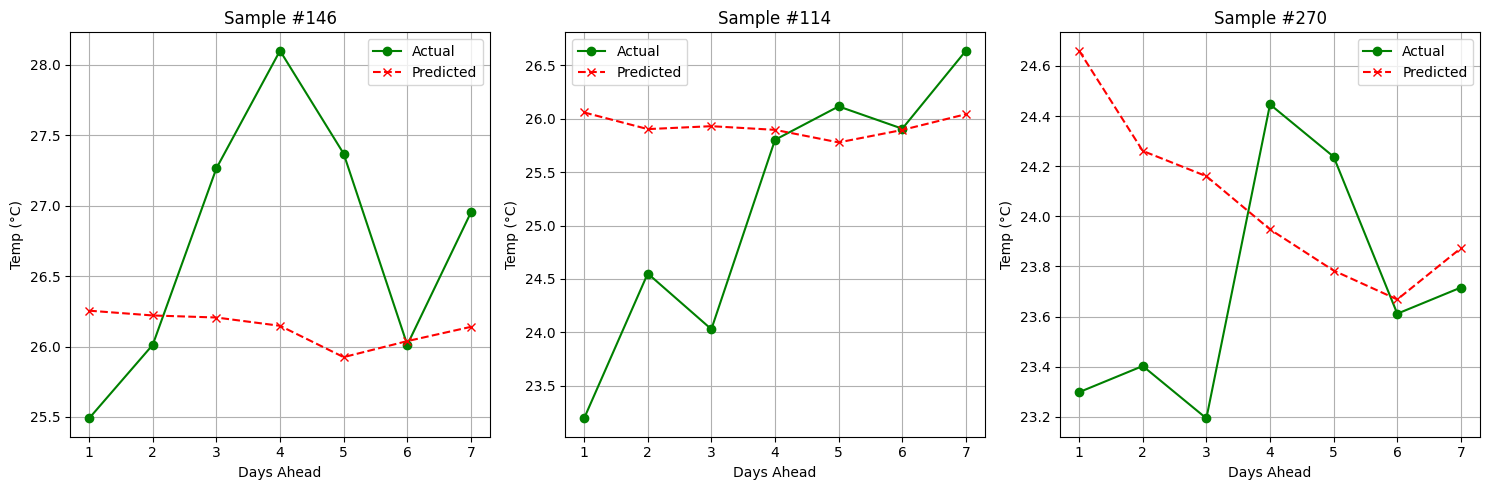

Final Accuracy: +/- 0.99 °C


In [191]:
predictions_pro = model2.predict(X_test_seq)

def inverse_transform_temp(scaled_preds, scaler):
    dummy = np.zeros((len(scaled_preds), 11))
    dummy[:, 0] = scaled_preds
    return scaler.inverse_transform(dummy)[:, 0]

unscaled_preds_pro = []
unscaled_actuals = []

for i in range(FORECAST_HORIZON):
    unscaled_preds_pro.append(inverse_transform_temp(predictions_pro[:, i], scaler))
    unscaled_actuals.append(inverse_transform_temp(y_test_seq[:, i], scaler))

unscaled_preds_pro = np.array(unscaled_preds_pro).T
unscaled_actuals = np.array(unscaled_actuals).T

plt.figure(figsize=(15, 5))
days = range(1, FORECAST_HORIZON + 1)

for i in range(3):
    idx = random.randint(0, len(unscaled_preds_pro) - 1)
    plt.subplot(1, 3, i+1)
    plt.plot(days, unscaled_actuals[idx], 'g-o', label='Actual')
    plt.plot(days, unscaled_preds_pro[idx], 'r--x', label='Predicted')
    plt.title(f"Sample #{idx}")
    plt.xlabel("Days Ahead")
    plt.ylabel("Temp (°C)")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

mae_final = np.mean(np.abs(unscaled_actuals - unscaled_preds_pro))
print(f"Final Accuracy: +/- {mae_final:.2f} °C")

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


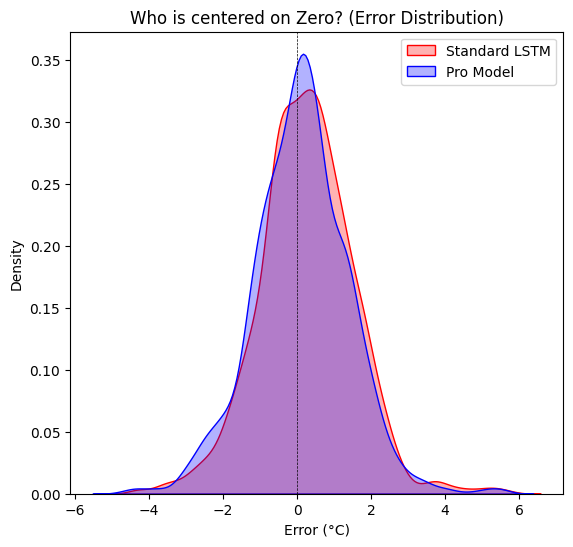

In [192]:
import seaborn as sns
error_std = unscaled_actuals - unscaled_predictions
error_pro = unscaled_actuals - unscaled_preds_pro

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.kdeplot(error_std.flatten(), label='Standard LSTM', fill=True, color='red', alpha=0.3)
sns.kdeplot(error_pro.flatten(), label='Pro Model', fill=True, color='blue', alpha=0.3)
plt.axvline(0, color='black', linestyle='--', linewidth=0.5)
plt.title("Who is centered on Zero? (Error Distribution)")
plt.xlabel("Error (°C)")
plt.legend()

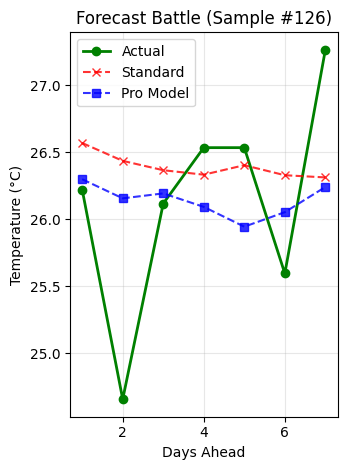

In [193]:
sample_idx = random.randint(0, len(unscaled_actuals) - 1)

plt.subplot(1, 2, 2)
days = range(1, 8)
plt.plot(days, unscaled_actuals[sample_idx], 'g-o', label='Actual', linewidth=2)
plt.plot(days, unscaled_predictions[sample_idx], 'r--x', label='Standard', alpha=0.8)
plt.plot(days, unscaled_preds_pro[sample_idx], 'b--s', label='Pro Model', alpha=0.8)
plt.title(f"Forecast Battle (Sample #{sample_idx})")
plt.xlabel("Days Ahead")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [194]:
print(f"Standard Model Max Error: {np.max(np.abs(error_std)):.2f} °C")
print(f"Pro Model Max Error:      {np.max(np.abs(error_pro)):.2f} °C")

Standard Model Max Error: 5.78 °C
Pro Model Max Error:      5.58 °C
